In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import Image
from IPython import display
import numpy as np
from scipy.spatial import Delaunay
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib widget
%matplotlib inline
import nfl_regression

In [2]:
train_receiver_stats, train_player_stats, train_weeks = nfl_regression.preprocess_year_data('2021')
X_train, Y_train = nfl_regression.get_yards_by_stats(train_receiver_stats, train_player_stats, train_weeks, '2021')

test_receiver_stats, test_player_stats, test_weeks = nfl_regression.preprocess_year_data('2023')
X_test, Y_test = nfl_regression.get_yards_by_stats(test_receiver_stats, test_player_stats, test_weeks, '2023')

In [3]:
play_data = test_receiver_stats
print(play_data.shape)
play_data.head(1)

(6119, 117)


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,Zone Coverage,birthDate,collegeName,displayName,height,nflId,officialPosition,updatedName,updatedName2,weight
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,25.0,1996-02-27,Penn State,Chris Godwin,6-1,44896.0,WR,Chris Godwin,Chris Godwin,209.0


In [4]:
foat_df = pd.read_csv('FoatbestPlayerNoError.csv')
foat_df.head(1)

,playId,nflId,2nd,3rd,4th,5th
0,97,41233,44896,39985,35634,35481


In [5]:
foat_results, foat_plays = foat_df['nflId'].values.tolist(), foat_df['playId'].values.tolist()
foat_results2, foat_results3 = foat_df['2nd'].values.tolist(), foat_df['3rd'].values.tolist()
foat_results4, foat_results5 = foat_df['4th'].values.tolist(), foat_df['5th'].values.tolist()
true_results, true_plays = play_data['nflId'].values.tolist(), play_data['playId'].values.tolist()

In [6]:
comp_list = []
count = 0
summed = 0
for play in foat_plays:
    try:
        index = true_plays.index(play)
        # print('found index - ' + str(index))
        count += 1
    except ValueError: 
        comp_list.append('NA')
        index = 10000

    if index != 10000:
        foat_index = foat_plays.index(play)
        if foat_results[foat_index] == true_results[index]:
            comp_list.append('True')
        else:
            comp_list.append('False')
    
print(count)
print(len(comp_list))

5410
5729


In [7]:
num_true = comp_list.count('True')
num_false = comp_list.count('False')
num_missing = comp_list.count('NA')
print('Number of matching players = ' + str(num_true))
print('Number of non-matching players = ' + str(num_false))
print('Number of missing players = ' + str(num_missing))

Number of matching players = 1158
Number of non-matching players = 4252
Number of missing players = 319


In [8]:
comp_list = []
count = 0
summed = 0
for play in foat_plays:
    try:
        index = true_plays.index(play)
        # print('found index - ' + str(index))
        count += 1
    except ValueError: 
        comp_list.append('NA')
        index = 10000

    if index != 10000:
        foat_index = foat_plays.index(play)
        if foat_results2[foat_index] == true_results[index]:
            comp_list.append('True')
        else:
            comp_list.append('False')
    
print(count)
print(len(comp_list))

5410
5729


In [9]:
num_true2 = comp_list.count('True')
num_false2 = comp_list.count('False')
num_missing2 = comp_list.count('NA')
print('Number of matching players = ' + str(num_true2))
print('Number of non-matching players = ' + str(num_false2))
print('Number of missing players = ' + str(num_missing2))

Number of matching players = 1112
Number of non-matching players = 4298
Number of missing players = 319


In [10]:
comp_list = []
count = 0
summed = 0
for play in foat_plays:
    try:
        index = true_plays.index(play)
        # print('found index - ' + str(index))
        count += 1
    except ValueError: 
        comp_list.append('NA')
        index = 10000

    if index != 10000:
        foat_index = foat_plays.index(play)
        if foat_results3[foat_index] == true_results[index]:
            comp_list.append('True')
        else:
            comp_list.append('False')
            
num_true3 = comp_list.count('True')
num_false3 = comp_list.count('False')
num_missing3 = comp_list.count('NA')
print('Number of matching players = ' + str(num_true3))
print('Number of non-matching players = ' + str(num_false3))
print('Number of missing players = ' + str(num_missing3))

Number of matching players = 932
Number of non-matching players = 4478
Number of missing players = 319


In [11]:
comp_list = []
count = 0
summed = 0
for play in foat_plays:
    try:
        index = true_plays.index(play)
        # print('found index - ' + str(index))
        count += 1
    except ValueError: 
        comp_list.append('NA')
        index = 10000

    if index != 10000:
        foat_index = foat_plays.index(play)
        if foat_results4[foat_index] == true_results[index]:
            comp_list.append('True')
        else:
            comp_list.append('False')
            
num_true4 = comp_list.count('True')
num_false4 = comp_list.count('False')
num_missing4 = comp_list.count('NA')
print('Number of matching players = ' + str(num_true4))
print('Number of non-matching players = ' + str(num_false4))
print('Number of missing players = ' + str(num_missing4))

Number of matching players = 756
Number of non-matching players = 4654
Number of missing players = 319


In [12]:
comp_list = []
count = 0
summed = 0
for play in foat_plays:
    try:
        index = true_plays.index(play)
        # print('found index - ' + str(index))
        count += 1
    except ValueError: 
        comp_list.append('NA')
        index = 10000

    if index != 10000:
        foat_index = foat_plays.index(play)
        if foat_results5[foat_index] == true_results[index]:
            comp_list.append('True')
        else:
            comp_list.append('False')
            
num_true5 = comp_list.count('True')
num_false5 = comp_list.count('False')
num_missing5 = comp_list.count('NA')
print('Number of matching players = ' + str(num_true5))
print('Number of non-matching players = ' + str(num_false5))
print('Number of missing players = ' + str(num_missing5))

Number of matching players = 446
Number of non-matching players = 4964
Number of missing players = 319


In [13]:
Positions = {'Position':[1, 2, 3, 4, 5], 'Occurences':[num_true, num_true2, num_true3, num_true4, num_true5]}
Positions = pd.DataFrame(Positions)

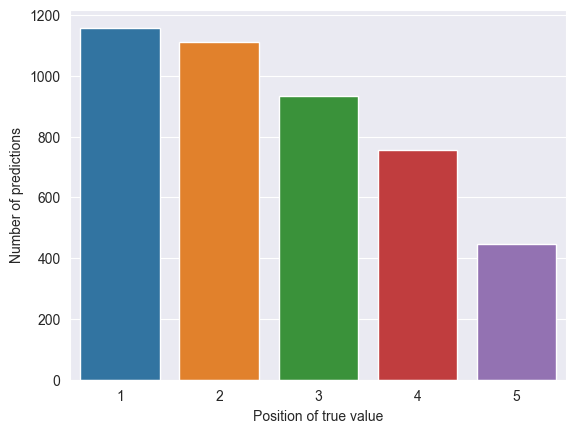

In [14]:
raw_data = {
    
    'x': ['1', '2', '3', '4', '5'],
    'y': [num_true, num_true2, num_true3, num_true4, num_true5]
    
}
sns.set_style("darkgrid")
sns.barplot(x='x', y='y', data=raw_data)
plt.ylabel('Number of predictions')
plt.xlabel('Position of true value')
plt.savefig("FoatmodelPredictions.pdf") 
plt.show()